# Part 1: Data Extraction

### Importing libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import time

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE

import xgboost
from xgboost import XGBClassifier

### Loading and Compiling Data

In [38]:
#importing data
#df = pd.read_csv('Combined_LCA_Disclosure_Data_FY2020_to_FY2024.csv', low_memory=False)
df2020 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2020.csv', low_memory=False)
df2021 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2021.csv', low_memory=False)
df2022 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2022.csv', low_memory=False)
df2023 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2023.csv', low_memory=False)
df2024 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2024.csv', low_memory=False)
all_data = [df2020, df2021,df2022,df2023,df2024]

df = pd.concat(all_data)
df.head(5)

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-19268-393467,Certified,2019-09-25,2019-10-01,NaN,H-1B,"APPLICATION ENGINEER, OMS [15-1199.02]",15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,N,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-200-19268-638983,Certified,2019-09-25,2019-10-01,NaN,H-1B,BI DEVELOPER II,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
2,I-200-19268-177184,Certified,2019-09-25,2019-10-01,NaN,H-1B,QUALITY ENGINEER,17-2141,MECHANICAL ENGINEERS,Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
3,I-200-19268-936403,Certified,2019-09-25,2019-10-01,NaN,H-1B,"SOFTWARE DEVELOPER, APPLICATIONS",15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
4,I-200-19268-394079,Certified,2019-09-25,2019-10-01,NaN,H-1B,QUALITY ENGINEER LEVEL II,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,LEGAL@THEEGIANTS.COM


In [39]:
# Delete previous dataframes to free memory
del df2020, df2021, df2022, df2023, df2024, all_data

### Data Overview

In [40]:
# overview
df.describe()

,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_PHONE_EXT,NAICS_CODE,EMPLOYER_POC_PHONE_EXT,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,WORKSITE_WORKERS,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,PREVAILING_WAGE,PW_OTHER_YEAR,TOTAL_WORKSITE_LOCATIONS
count,3.564698e+06,3.564698e+06,3.564698e+06,3.564698e+06,3.564698e+06,3.564698e+06,3.564698e+06,2.163120e+05,3.564698e+06,2.153180e+05,2.584638e+06,1.691640e+05,3.551363e+06,3.564696e+06,1.167714e+06,3.562736e+06,220746.000000,3.551365e+06
mean,1.762165e+00,6.351761e-01,3.715257e-01,1.485913e-01,1.008949e-02,3.040381e-01,2.996994e-01,5.401010e+02,4.248195e+05,7.693272e+02,1.521254e+10,9.605332e+02,1.761110e+00,1.121646e+05,1.443967e+05,9.622957e+04,2021.199918,1.451180e+00
std,5.898817e+00,3.915777e+00,2.468180e+00,1.311127e+00,7.237273e-01,1.626940e+00,1.490564e+00,1.535733e+04,2.086486e+05,1.916066e+04,5.798979e+10,5.955874e+03,5.891472e+00,6.508975e+05,9.259075e+06,4.204133e+04,1.739751,7.184328e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.710210e+05,0.000000e+00,1.032959e+09,0.000000e+00,1.000000e+00,7.250000e+00,7.500000e+00,7.250000e+00,1990.000000,1.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.344130e+05,0.000000e+00,1.305665e+10,2.700000e+01,1.000000e+00,8.077900e+04,9.740000e+04,7.444300e+04,2020.000000,1.000000e+00
50%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.415110e+05,1.000000e+00,1.469291e+10,1.110000e+02,1.000000e+00,1.047490e+05,1.253280e+05,9.439000e+04,2021.000000,1.000000e+00
75%,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.760000e+02,5.415120e+05,3.600000e+02,1.703678e+10,2.300000e+02,1.000000e+00,1.390000e+05,1.653000e+05,1.191220e+05,2023.000000,2.000000e+00
max,1.098000e+03,1.098000e+03,1.098000e+03,1.098000e+03,1.098000e+03,1.098000e+03,1.098000e+03,7.002824e+06,5.698555e+06,7.002824e+06,8.282103e+13,2.108820e+06,1.098000e+03,1.204781e+09,1.000000e+10,8.108500e+05,2024.000000,1.000000e+01


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3564698 entries, 0 to 890367
Data columns (total 96 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   CASE_NUMBER                     object 
 1   CASE_STATUS                     object 
 2   RECEIVED_DATE                   object 
 3   DECISION_DATE                   object 
 4   ORIGINAL_CERT_DATE              object 
 5   VISA_CLASS                      object 
 6   JOB_TITLE                       object 
 7   SOC_CODE                        object 
 8   SOC_TITLE                       object 
 9   FULL_TIME_POSITION              object 
 10  BEGIN_DATE                      object 
 11  END_DATE                        object 
 12  TOTAL_WORKER_POSITIONS          int64  
 13  NEW_EMPLOYMENT                  int64  
 14  CONTINUED_EMPLOYMENT            int64  
 15  CHANGE_PREVIOUS_EMPLOYMENT      int64  
 16  NEW_CONCURRENT_EMPLOYMENT       int64  
 17  CHANGE_EMPLOYER                 i

In [42]:
#checking for missing value
df.isnull()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,False,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,True,True,True,True,True
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890363,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False
890364,False,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False
890365,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
890366,False,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False


The dataset contains several missing values, which will be addressed appropriately after selecting the features for the model.

# Part 2: Exploratory Data Analysis & Feature Engineering

### Case Status Distribution

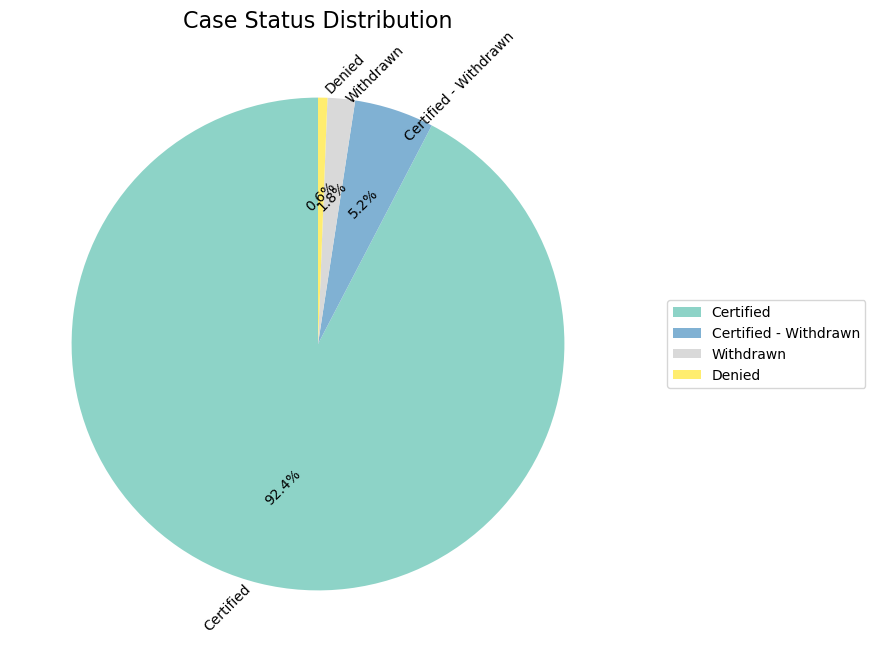

In [43]:
# Distribution of case statuses
case_status_counts = df['CASE_STATUS'].value_counts()

# Case status distribution using pie chart
plt.figure(figsize=(8, 8))
case_status_counts.plot(kind='pie', startangle=90, cmap='Set3',autopct='%1.1f%%', textprops={'rotation':45},legend=True)
plt.title('Case Status Distribution', fontsize=16)
plt.ylabel('')  # Remove y-label for better appearance
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.show()

### Total Number of Applications Over the Years 

In [44]:
# Total number of applications over the years (2020-2024)
df['YEAR'] = pd.to_datetime(df['DECISION_DATE']).dt.year  # Extract year from decision date
yearly_applications = df['YEAR'].value_counts().sort_index()
print(yearly_applications) #Checking Values

YEAR
2019    112017
2020    704831
2021    707097
2022    702514
2023    749844
2024    588395
Name: count, dtype: int64


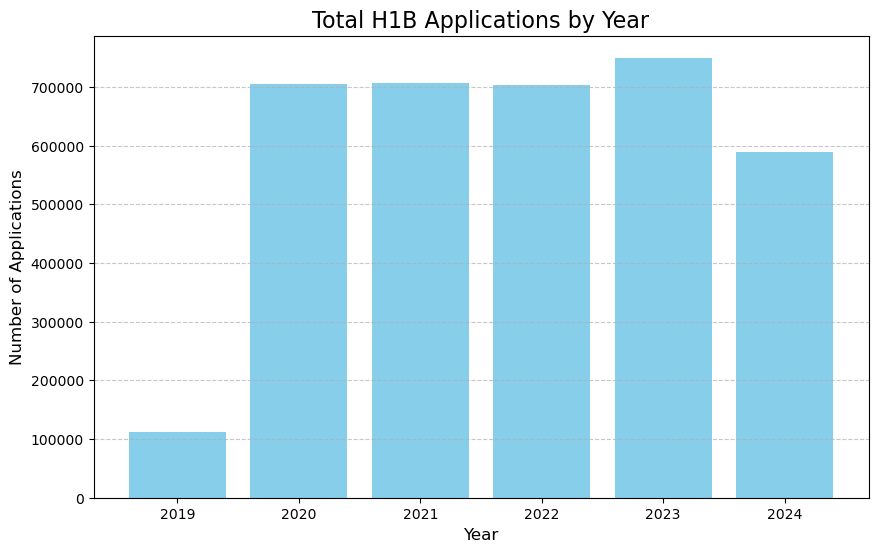

In [45]:
#plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_applications.index, yearly_applications.values, color='skyblue')
plt.title('Total H1B Applications by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)
plt.xticks(yearly_applications.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Number of H1B Applicants by State

In [46]:
# Example DataFrame
state_counts = df['EMPLOYER_STATE'].value_counts().reset_index()
state_counts.columns = ['State', 'Applicants']

# Use Plotly Express to create a choropleth map
fig = px.choropleth(
    state_counts,
    locations='State',          # Column with state abbreviations
    locationmode='USA-states',  # Specify USA states
    color='Applicants',         # Color by the number of applicants
    color_continuous_scale='Viridis',  # Color scale
    scope='usa',                # Focus on the USA
    title='Number of H1B Applicants by State',
    width=1000,
    height=600
)

# Display the map
fig.show()

### Top 10 Occupations in H1B Applications

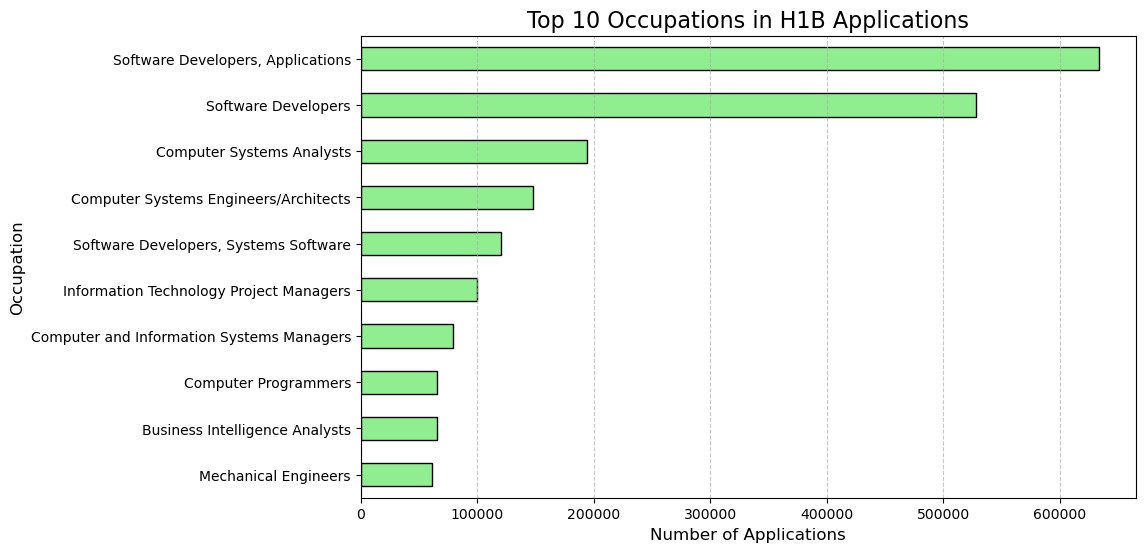

In [47]:
# Top occupations in the dataset
top_occupations = df['SOC_TITLE'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_occupations.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Top 10 Occupations in H1B Applications', fontsize=16)
plt.xlabel('Number of Applications', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Salary Analysis

In [48]:
#Clean and convert salaries to numeric, handling outliers
unique_units = df['PW_UNIT_OF_PAY'].unique()
print(unique_units)

['Year' 'Hour' 'Bi-Weekly' nan 'Month' 'Week']


In [49]:
# Convert salaries to 'Year'
df['PREVAILING_WAGE'] = pd.to_numeric(df['PREVAILING_WAGE'], errors='coerce')
df = df[df['PREVAILING_WAGE'] > 0]  # Filter out non-positive values

conversion_factors = {
    'Year': 1,            # No Normalization
    'Month': 12,          # 12 months in a year
    'Bi-Weekly': 26,      # 26 bi-weekly periods in a year
    'Week': 52,           # 52 weeks in a year
    'Hour': 2080          # 52 weeks in a year x 40 hrs a week
}

df['ANNUAL_WAGE'] = df.apply(
    lambda row: row['PREVAILING_WAGE'] * conversion_factors.get(row['PW_UNIT_OF_PAY'], 1),
    axis=1
)

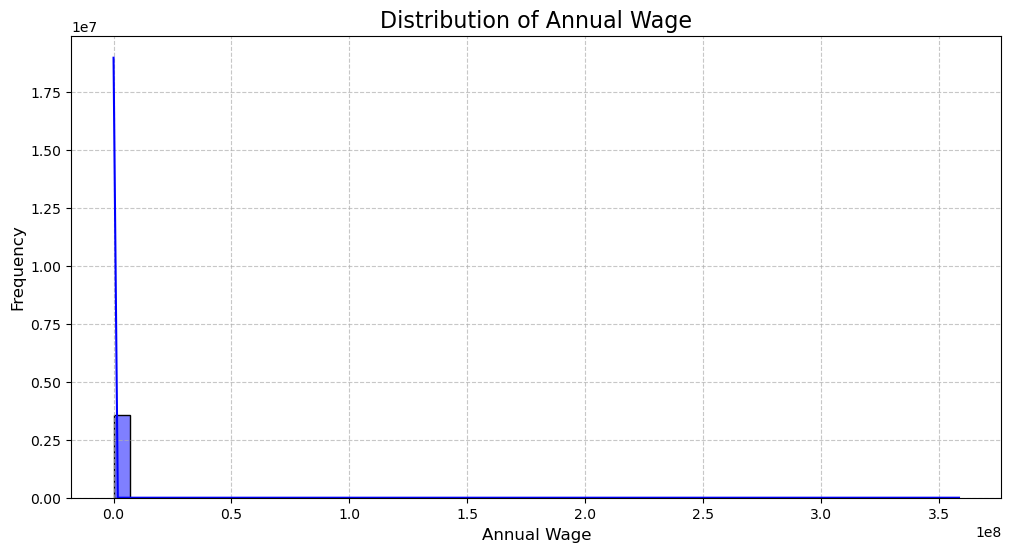

In [50]:
# Plot the distribution of Annual Wage
plt.figure(figsize=(12, 6))
sns.histplot(df['ANNUAL_WAGE'], bins=50, kde=True, color='blue')
plt.title('Distribution of Annual Wage', fontsize=16)
plt.xlabel('Annual Wage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

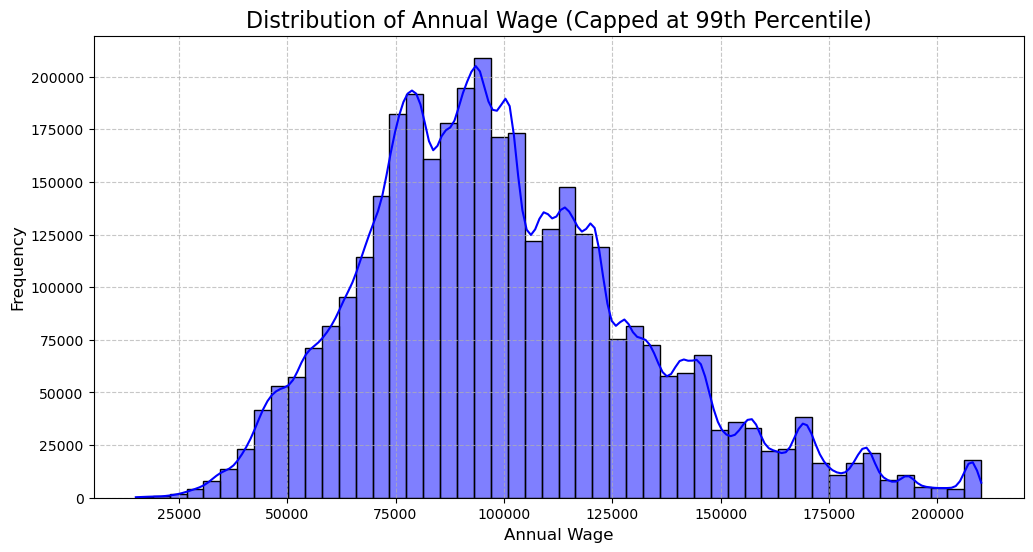

In [51]:
# Cap outliers at the 99th percentile
wage_cap = df['ANNUAL_WAGE'].quantile(0.99)
filtered_df = df[df['ANNUAL_WAGE'] <= wage_cap]

# Plot the distribution of Annual Wage with outliers capped
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['ANNUAL_WAGE'], bins=50, kde=True, color='blue')
plt.title('Distribution of Annual Wage (Capped at 99th Percentile)', fontsize=16)
plt.xlabel('Annual Wage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Top 10 Occupations by Average Annual Wage

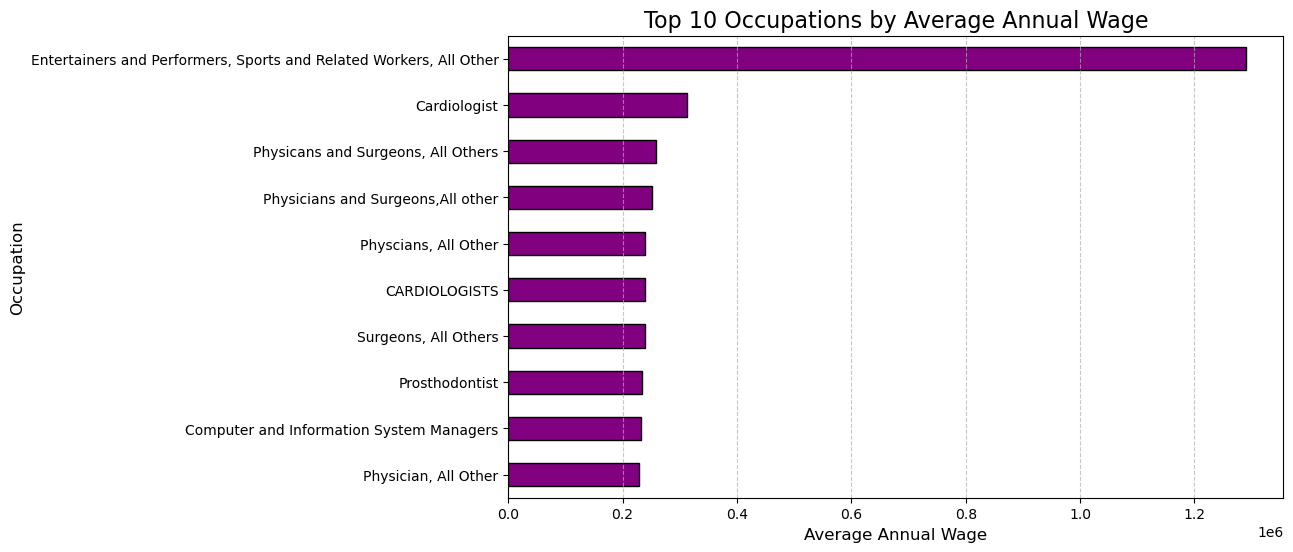

In [52]:
# Analyze average salaries by occupation
avg_salaries = df.groupby('SOC_TITLE')['ANNUAL_WAGE'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_salaries.plot(kind='barh', color='purple', edgecolor='black')
plt.title('Top 10 Occupations by Average Annual Wage', fontsize=16)
plt.xlabel('Average Annual Wage', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Top 10 Employers for H1B Applications 

In [53]:
# Frequency encoding for EMPLOYER_NAME

frequency_encoding = df['EMPLOYER_NAME'].value_counts(normalize=True)  # Compute frequency
df['EMPLOYER_NAME_FREQUENCY'] = df['EMPLOYER_NAME'].map(frequency_encoding)  # Map to DataFrame

# Get top 10 high-frequency companies
top_10_employers = frequency_encoding.head(10)

# Display the top 10
print("Top 10 Employers by Frequency:")
print(top_10_employers)

Top 10 Employers by Frequency:
EMPLOYER_NAME
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    0.026495
Google LLC                                0.017550
Ernst & Young U.S. LLP                    0.017419
Amazon.com Services LLC                   0.016736
Microsoft Corporation                     0.015522
INFOSYS LIMITED                           0.012091
TATA CONSULTANCY SERVICES LIMITED         0.010956
Apple Inc.                                0.007054
Accenture LLP                             0.006751
Intel Corporation                         0.006360
Name: proportion, dtype: float64


### Finding Decision Duration

In [54]:
#get the processing time from subtracting decision date and start date and case status is certified
#processing the time into usable format
df.loc[:, 'BEGIN_DATE'] = pd.to_datetime(df['BEGIN_DATE'])
df.loc[:, 'DECISION_DATE'] = pd.to_datetime(df['DECISION_DATE'])
df.loc[:, 'RECEIVED_DATE'] = pd.to_datetime(df['RECEIVED_DATE'])

#ensure all days are calculated correctly
df["Decision_Duration"] = np.abs(df["DECISION_DATE"] - df["RECEIVED_DATE"])
df['Decision_Duration'] = pd.to_timedelta(df['Decision_Duration']).dt.days
df.Decision_Duration.value_counts()

Decision_Duration
7       2578323
8        507852
10       104414
6         48301
5         39104
         ...   
1714          1
1479          1
1655          1
1626          1
1618          1
Name: count, Length: 1434, dtype: int64

### Finding Correlation Between Variables

##### Filtering Dataframe for Variables Possibly Related to Case Staus

In [55]:
#filtering current df
df1 = df.copy()
df1 = df[['CASE_STATUS','Decision_Duration','RECEIVED_DATE','SOC_TITLE','FULL_TIME_POSITION','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','TOTAL_WORKER_POSITIONS','WORKSITE_CITY','WORKSITE_STATE','WORKSITE_WORKERS','WORKSITE_POSTAL_CODE','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','ANNUAL_WAGE','H_1B_DEPENDENT','SUPPORT_H1B']]

In [56]:
'''
Preprocessing features
#:'Decision_Duration','TOTAL_WORKER_POSITIONS','ANNUAL_WAGE'
Categorical:'CASE_STATUS','RECEIVED_DATE','SOC_TITLE','FULL_TIME_POSITION','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','WORKSITE_CITY','WORKSITE_STATE','WORKSITE_WORKERS','WORKSITE_POSTAL_CODE','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','H_1B_DEPENDENT','SUPPORT_H1B']
'''

cat_columns = ['CASE_STATUS','RECEIVED_DATE','SOC_TITLE','FULL_TIME_POSITION','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','WORKSITE_CITY','WORKSITE_STATE','WORKSITE_WORKERS','WORKSITE_POSTAL_CODE','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','H_1B_DEPENDENT','SUPPORT_H1B']

label_encoder= {}
for col in cat_columns:
    label_encoder[col] = LabelEncoder()
    df1[col] = label_encoder[col].fit_transform(df1[col])

/tmp/ipykernel_4760/3219560039.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4760/3219560039.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4760/3219560039.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4

In [57]:
df1.head(5)

,CASE_STATUS,Decision_Duration,RECEIVED_DATE,SOC_TITLE,FULL_TIME_POSITION,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,TOTAL_WORKER_POSITIONS,WORKSITE_CITY,WORKSITE_STATE,WORKSITE_WORKERS,WORKSITE_POSTAL_CODE,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,ANNUAL_WAGE,H_1B_DEPENDENT,SUPPORT_H1B
0,0,6,223,290,1,89786,5727,38,2,1,13608,37,82,11325,494,16,95118.0,0,4
1,0,6,223,1607,1,47200,6247,4,2,1,4637,46,82,10056,1296,9,81120.0,2,2
2,0,6,223,1122,1,55202,11671,24,2,1,8925,23,82,12364,2742,25,81120.0,2,2
3,0,6,223,1607,1,150953,13067,24,0,1,27225,23,82,12411,3155,58,110240.0,2,2
4,0,6,223,290,1,53537,2397,14,0,1,4515,37,82,11597,3155,58,65333.0,2,2


In [58]:
print(df1['Decision_Duration'].dtype)

int64


#### Finding Correlation Variables

In [59]:
'''
Spearman correlation can help detect non-linear, categorical, and ordinal data. Good at ranked variables. So maybe it's better in this case when compared to pearson.
'''
#spearman correlation
corr = df1.corr(method='spearman')
corr_matrix = corr['CASE_STATUS']
print(corr_matrix.sort_values(ascending=False))

#pearson correlation
pearson_corr = df1.corr()
pearson_corr_matrix = pearson_corr['CASE_STATUS']
print(pearson_corr_matrix.sort_values(ascending=False))

CASE_STATUS                    1.000000
Decision_Duration              0.182314
SUPPORT_H1B                    0.046704
AGENT_ATTORNEY_CITY            0.038245
EMPLOYER_NAME                  0.036510
AGENT_ATTORNEY_STATE           0.025127
SOC_TITLE                     -0.005828
WORKSITE_CITY                 -0.007023
H_1B_DEPENDENT                -0.014863
FULL_TIME_POSITION            -0.015860
WORKSITE_STATE                -0.016563
EMPLOYER_STATE                -0.018469
WORKSITE_POSTAL_CODE          -0.018878
AGENT_REPRESENTING_EMPLOYER   -0.022811
EMPLOYER_CITY                 -0.026106
WORKSITE_WORKERS              -0.030594
TOTAL_WORKER_POSITIONS        -0.039636
ANNUAL_WAGE                   -0.063255
RECEIVED_DATE                 -0.069258
Name: CASE_STATUS, dtype: float64
CASE_STATUS                    1.000000
Decision_Duration              0.303863
SUPPORT_H1B                    0.029718
EMPLOYER_NAME                  0.028218
AGENT_ATTORNEY_CITY            0.022768
AGENT_

In [60]:
target_corr = corr['CASE_STATUS'].drop('CASE_STATUS').sort_values(ascending=False)
target_pearcorr = pearson_corr['CASE_STATUS'].drop('CASE_STATUS').sort_values(ascending=False)

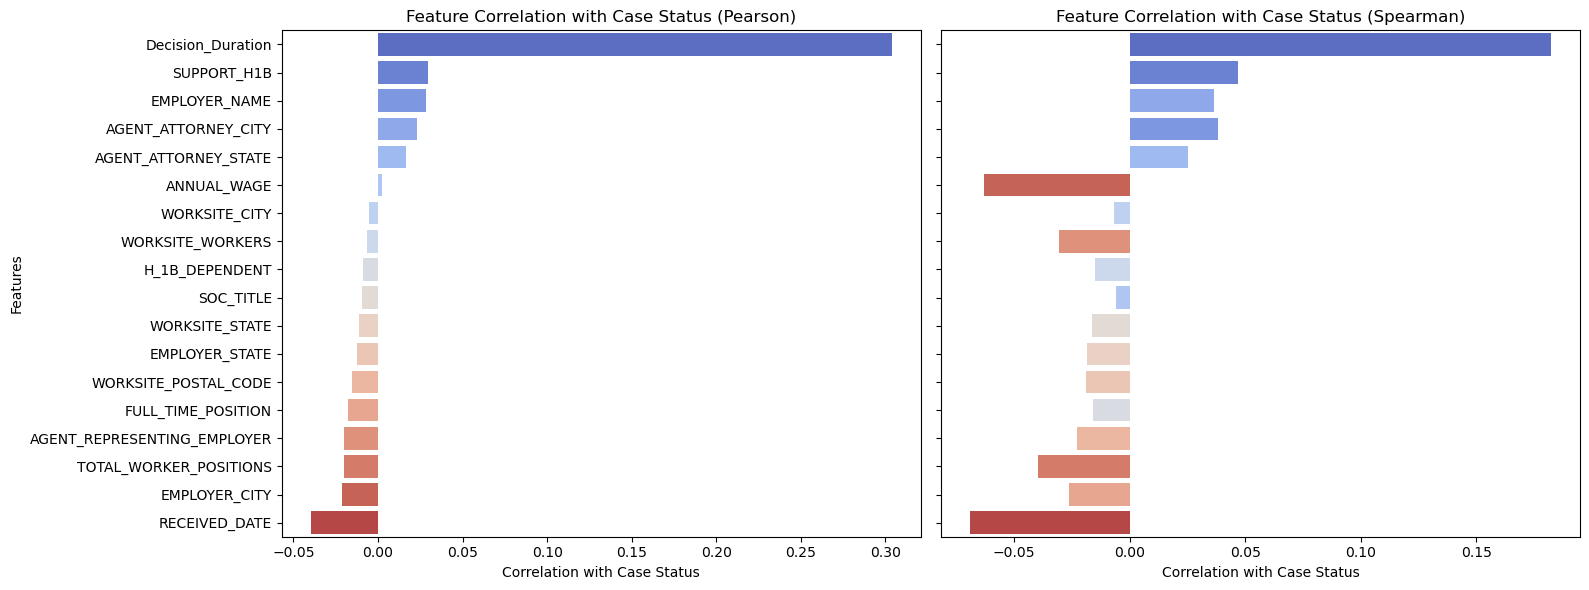

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Pearson correlation
sns.barplot(x=target_pearcorr.values, y=target_pearcorr.index, palette="coolwarm", hue=target_pearcorr.index , ax=axes[0], legend=False)
axes[0].set_title("Feature Correlation with Case Status (Pearson)")
axes[0].set_xlabel("Correlation with Case Status")
axes[0].set_ylabel("Features")

# Plot Spearman correlation
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm", hue=target_corr.index, ax=axes[1], legend=False)
axes[1].set_title("Feature Correlation with Case Status (Spearman)")
axes[1].set_xlabel("Correlation with Case Status")
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

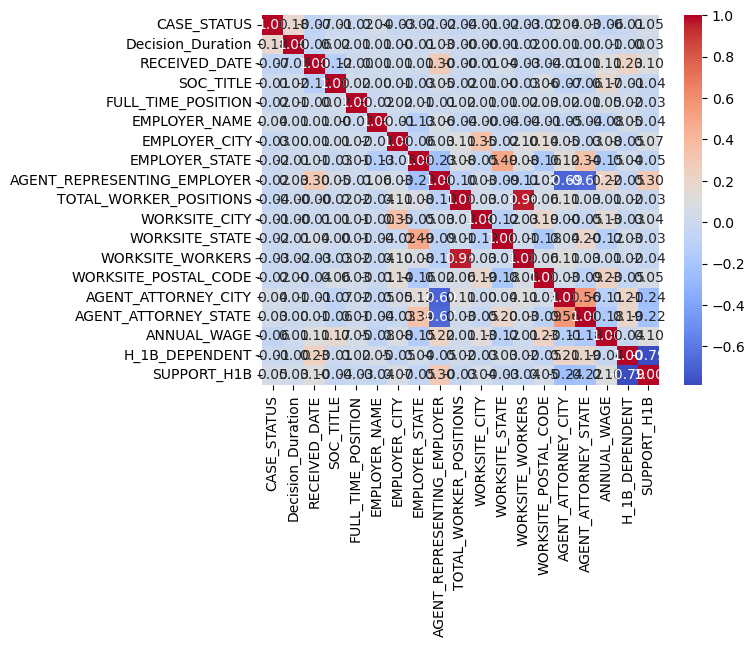

'\n# Plot as a bar chart\nplt.figure(figsize=(10, 6))\nsns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")\nplt.xlabel("Correlation with Case Status")\nplt.ylabel("Features")\nplt.title("Feature Correlation with Cade Status - Spearman")\nplt.show()\n'

In [62]:
#plot spearman correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

target_corr = corr['CASE_STATUS'].drop('CASE_STATUS').sort_values(ascending=False)

'''
# Plot as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.xlabel("Correlation with Case Status")
plt.ylabel("Features")
plt.title("Feature Correlation with Cade Status - Spearman")
plt.show()
'''

#### Mutual Information Classification

In [63]:
X = df1.drop(columns=['CASE_STATUS'])
y = df1['CASE_STATUS'] 

mi_scores = mutual_info_classif(X, y, discrete_features=False)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="Mutual Information Score", ascending=False)
print(mi_scores_df)

                        Feature  Mutual Information Score
0             Decision_Duration                  0.322950
3            FULL_TIME_POSITION                  0.264747
17                  SUPPORT_H1B                  0.231359
7   AGENT_REPRESENTING_EMPLOYER                  0.198788
16               H_1B_DEPENDENT                  0.173565
8        TOTAL_WORKER_POSITIONS                  0.116331
14         AGENT_ATTORNEY_STATE                  0.103750
13          AGENT_ATTORNEY_CITY                  0.083457
2                     SOC_TITLE                  0.070726
4                 EMPLOYER_NAME                  0.070666
6                EMPLOYER_STATE                  0.055708
10               WORKSITE_STATE                  0.050217
5                 EMPLOYER_CITY                  0.035629
12         WORKSITE_POSTAL_CODE                  0.020923
15                  ANNUAL_WAGE                  0.019535
9                 WORKSITE_CITY                  0.019226
1             

/tmp/ipykernel_4760/1536435519.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




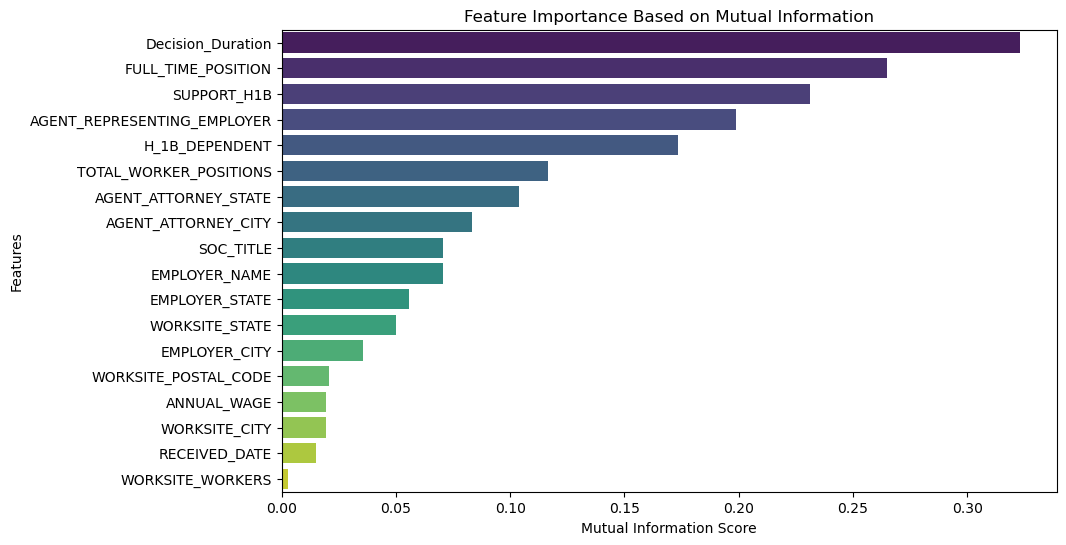

In [64]:
# Plot mutual information scores
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores_df['Mutual Information Score'], y=mi_scores_df['Feature'], palette="viridis")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Feature Importance Based on Mutual Information")
plt.show()

# Part 3: Data Pre-processing

## Filtering Out DataFrame

### 1. Selecting Features

In [65]:
#selecting features based on correlation coefficients from last section
selectdf = df.loc[:, 
    ['CASE_STATUS',
     'SOC_TITLE',
     'ANNUAL_WAGE',
     'SUPPORT_H1B',
     'H_1B_DEPENDENT',
     'EMPLOYER_NAME',
     'EMPLOYER_STATE',
     'EMPLOYER_CITY',
     'AGENT_REPRESENTING_EMPLOYER',
     'AGENT_ATTORNEY_STATE',
     'AGENT_ATTORNEY_CITY',
     'FULL_TIME_POSITION',
     'WORKSITE_STATE',
     'WORKSITE_CITY',
     'WORKSITE_POSTAL_CODE',
     'WORKSITE_WORKERS',
     'TOTAL_WORKER_POSITIONS',
     'RECEIVED_DATE',
     'Decision_Duration'
    ]]
selectdf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3562736 entries, 0 to 890367
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   CASE_STATUS                  object 
 1   SOC_TITLE                    object 
 2   ANNUAL_WAGE                  float64
 3   SUPPORT_H1B                  object 
 4   H_1B_DEPENDENT               object 
 5   EMPLOYER_NAME                object 
 6   EMPLOYER_STATE               object 
 7   EMPLOYER_CITY                object 
 8   AGENT_REPRESENTING_EMPLOYER  object 
 9   AGENT_ATTORNEY_STATE         object 
 10  AGENT_ATTORNEY_CITY          object 
 11  FULL_TIME_POSITION           object 
 12  WORKSITE_STATE               object 
 13  WORKSITE_CITY                object 
 14  WORKSITE_POSTAL_CODE         object 
 15  WORKSITE_WORKERS             float64
 16  TOTAL_WORKER_POSITIONS       int64  
 17  RECEIVED_DATE                object 
 18  Decision_Duration            int64  
dtypes: flo

In [66]:
selectdf["WORKSITE_WORKERS"] = selectdf["WORKSITE_WORKERS"].fillna(0).astype(int)
selectdf.WORKSITE_WORKERS.value_counts()

WORKSITE_WORKERS
1      3382051
10       39484
3        23344
5        21866
25       17134
        ...   
91           1
69           1
39           1
121          1
120          1
Name: count, Length: 83, dtype: int64

In [67]:
selectdf.head(5)

,CASE_STATUS,SOC_TITLE,ANNUAL_WAGE,SUPPORT_H1B,H_1B_DEPENDENT,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_CITY,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_STATE,AGENT_ATTORNEY_CITY,FULL_TIME_POSITION,WORKSITE_STATE,WORKSITE_CITY,WORKSITE_POSTAL_CODE,WORKSITE_WORKERS,TOTAL_WORKER_POSITIONS,RECEIVED_DATE,Decision_Duration
0,Certified,"COMPUTER OCCUPATIONS, ALL OTHER",95118.0,NaN,N,"JO-ANN STORES, INC.",OH,HUDSON,Y,IL,CHICAGO,Y,OH,Hudson,44224,0,1,2019-09-25 00:00:00,6
1,Certified,"SOFTWARE DEVELOPERS, APPLICATIONS",81120.0,Y,Y,DENKEN SOLUTIONS INC.,CA,IRVINE,Y,FL,JACKSONVILLE,Y,TN,BRENTWOOD,37027,0,1,2019-09-25 00:00:00,6
2,Certified,MECHANICAL ENGINEERS,81120.0,Y,Y,"EPITEC, INC.",MI,SOUTHFIELD,Y,MI,TROY,Y,MI,Dearborn,48126,0,1,2019-09-25 00:00:00,6
3,Certified,"SOFTWARE DEVELOPERS, APPLICATIONS",110240.0,Y,Y,"SYSTEMS TECHNOLOGY GROUP, INC.",MI,TROY,N,NaN,NaN,Y,MI,Taylor,48180,0,1,2019-09-25 00:00:00,6
4,Certified,"COMPUTER OCCUPATIONS, ALL OTHER",65333.0,Y,Y,E-GIANTS TECHNOLOGIES LLC,IA,CLIVE,N,NaN,NaN,Y,OH,BLUE ASH,45242,0,1,2019-09-25 00:00:00,6


### 2. Filtering "CASE_STATUS" for Certified and Denied

In [68]:
#see count before
print(selectdf.CASE_STATUS.value_counts())

#filter out case status into certifief and withdrawn only
#save into selectdf_filtered
selectdf_filtered = selectdf[selectdf['CASE_STATUS'].isin(['Certified', 'Denied'])]
print(selectdf_filtered.CASE_STATUS.value_counts())

CASE_STATUS
Certified                3292311
Certified - Withdrawn     184634
Withdrawn                  64014
Denied                     21777
Name: count, dtype: int64
CASE_STATUS
Certified    3292311
Denied         21777
Name: count, dtype: int64


In [69]:
#free up memory
del df, selectdf

### 3. Transforming DataFrame

In [70]:
'''
Preprocessing features
#:'Decision_Duration','TOTAL_WORKER_POSITIONS','ANNUAL_WAGE'
Categorical:
    'CASE_STATUS',
    'SOC_TITLE',
    'SUPPORT_H1B',
    'H_1B_DEPENDENT',
    'EMPLOYER_NAME',
    'EMPLOYER_STATE',
    'EMPLOYER_CITY',
    'AGENT_REPRESENTING_EMPLOYER',
    'AGENT_ATTORNEY_STATE',
    'AGENT_ATTORNEY_CITY',
    'FULL_TIME_POSITION',
    'WORKSITE_STATE',
    'WORKSITE_CITY',
    'WORKSITE_POSTAL_CODE',
    'RECEIVED_DATE']]
'''
selectdf_filtered = selectdf_filtered.copy()

#Label Encoding for categorical features
cat_columns = [
    'CASE_STATUS',
    'SOC_TITLE',
    'SUPPORT_H1B',
    'H_1B_DEPENDENT',
    'EMPLOYER_NAME',
    'EMPLOYER_STATE',
    'EMPLOYER_CITY',
    'AGENT_REPRESENTING_EMPLOYER',
    'AGENT_ATTORNEY_STATE',
    'AGENT_ATTORNEY_CITY',
    'FULL_TIME_POSITION',
    'WORKSITE_STATE',
    'WORKSITE_CITY',
    'WORKSITE_POSTAL_CODE',
    'RECEIVED_DATE'
    ]

#prevent categories from mismatching
label_encoder= {}
for col in cat_columns:
    label_encoder[col] = LabelEncoder()
    selectdf_filtered[col] = label_encoder[col].fit_transform(selectdf_filtered[col])

In [71]:
print(selectdf_filtered.CASE_STATUS.value_counts())
print(selectdf_filtered.info())

CASE_STATUS
0    3292311
1      21777
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 3314088 entries, 0 to 890367
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   CASE_STATUS                  int64  
 1   SOC_TITLE                    int64  
 2   ANNUAL_WAGE                  float64
 3   SUPPORT_H1B                  int64  
 4   H_1B_DEPENDENT               int64  
 5   EMPLOYER_NAME                int64  
 6   EMPLOYER_STATE               int64  
 7   EMPLOYER_CITY                int64  
 8   AGENT_REPRESENTING_EMPLOYER  int64  
 9   AGENT_ATTORNEY_STATE         int64  
 10  AGENT_ATTORNEY_CITY          int64  
 11  FULL_TIME_POSITION           int64  
 12  WORKSITE_STATE               int64  
 13  WORKSITE_CITY                int64  
 14  WORKSITE_POSTAL_CODE         int64  
 15  WORKSITE_WORKERS             int64  
 16  TOTAL_WORKER_POSITIONS       int64  
 17  RECEIVED_DATE             

### 4. Defining target and features

In [72]:
# Define target and features
target = 'CASE_STATUS'
features = ['SOC_TITLE', 'ANNUAL_WAGE', 'SUPPORT_H1B', 'H_1B_DEPENDENT', 'EMPLOYER_NAME', 'EMPLOYER_STATE', 
            'EMPLOYER_CITY', 'AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_STATE', 'AGENT_ATTORNEY_CITY',
            'FULL_TIME_POSITION', 'WORKSITE_STATE', 'WORKSITE_CITY', 'WORKSITE_POSTAL_CODE',
            'WORKSITE_WORKERS', 'TOTAL_WORKER_POSITIONS', 'RECEIVED_DATE', 'Decision_Duration']

X = selectdf_filtered[features]
y = selectdf_filtered[target]

#Ensuring y is integer
y = y.astype(int)

#Test,train,split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Part 4: Models

### 1. Logistic Regression

In [73]:
#Scaling features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [74]:
#Model with imbalance data
lg_imbalanced = LogisticRegression(max_iter=1000, solver='newton-cg')
lg_imbalanced.fit(X_train_scaled, y_train)

# Predictions
lg_imbalanced_y_pred = lg_imbalanced.predict(X_test_scaled)

# Evaluate
print("Accuracy of Logistic Regression(imbalanced):",accuracy_score(y_test, lg_imbalanced_y_pred))
print(classification_report(y_test, lg_imbalanced_y_pred))

Accuracy of Logistic Regression(imbalanced): 0.9980497411556918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    987767
           1       0.94      0.75      0.83      6460

    accuracy                           1.00    994227
   macro avg       0.97      0.87      0.92    994227
weighted avg       1.00      1.00      1.00    994227



In [75]:
#Setting up model with balanced dataset

#Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#scale again to ensure it can converge
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [76]:
#Setting up model with balanced
lg = LogisticRegression(max_iter=1000, solver='newton-cg')
lg.fit(X_train_smote_scaled, y_train_smote)

# Predictions
lg_y_pred = lg.predict(X_test_scaled)

# Evaluate the model
lg_accuracy = accuracy_score(y_test, lg_y_pred)
lg_report = classification_report(y_test, lg_y_pred)


print("Accuracy of Logistic Regression(balanced):", lg_accuracy)
print(lg_report)

Accuracy of Logistic Regression(balanced): 0.9876728352780603
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    987767
           1       0.34      0.92      0.49      6460

    accuracy                           0.99    994227
   macro avg       0.67      0.95      0.74    994227
weighted avg       1.00      0.99      0.99    994227



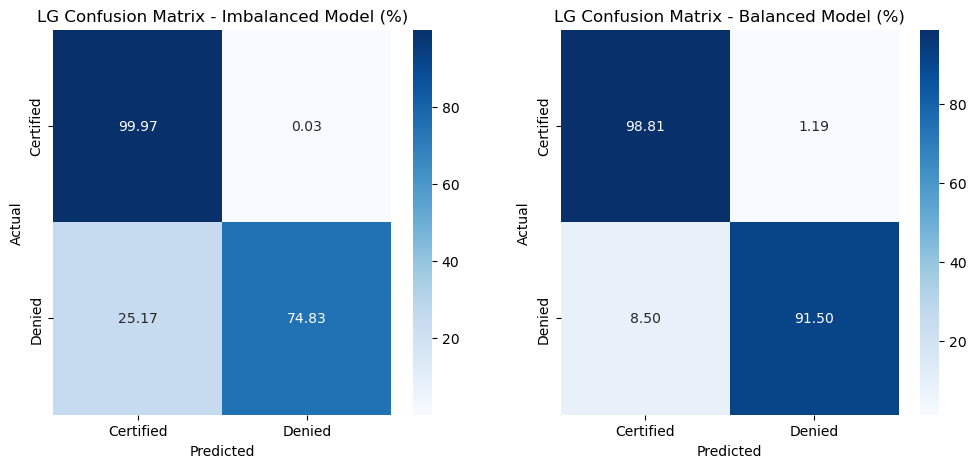

In [77]:
#compute confusion matrix and plot
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', ax=ax, xticklabels=['Certified', 'Denied'], yticklabels=['Certified', 'Denied'])
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_confusion_matrix(y_test, lg_imbalanced_y_pred, 'LG Confusion Matrix - Imbalanced Model (%)', axes[0])
plot_confusion_matrix(y_test, lg_y_pred, 'LG Confusion Matrix - Balanced Model (%)', axes[1])
plt.show()

### 2. Neural Network

In [ ]:
#set up nn
def create_nn():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_nn()

In [ ]:
#Train with imbalanced dataset
nn_imbalanced = create_nn()
nn_imbalanced.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the imbalanced model
nn_y_pred_imbalanced = (nn_imbalanced.predict(X_test) > 0.5).astype(int)

print("Imbalanced Neural Network:")
print("Accuracy of imbalanced NN:", accuracy_score(y_test, nn_y_pred_imbalanced))
print(classification_report(y_test, nn_y_pred_imbalanced))

In [ ]:
#Setting up model with balanced dataset

#Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#scaling 
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Train balanced dataset
nn_balanced = create_nn()
nn_balanced.fit(X_train_smote_scaled, y_train_smote, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the balanced model
nn_y_pred_balanced = (nn_balanced.predict(X_test_scaled) > 0.5).astype(int)
print("Balanced Neural Network with SMOTE:")
print("Accuracy of balanced NN:", accuracy_score(y_test, nn_y_pred_balanced))
print(classification_report(y_test, nn_y_pred_balanced))

In [ ]:
#compute and plot confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_confusion_matrix(y_test, nn_y_pred_imbalanced, 'NN Confusion Matrix - Imbalanced Model (%)', axes[0])
plot_confusion_matrix(y_test, nn_y_pred_balanced, 'NN Confusion Matrix - Balanced Model (%)', axes[1])
plt.show()

### 3. XGBoost

In [78]:
# Initialize and train XGBoost model
xgb_model_imbalanced = XGBClassifier(eval_metric='logloss')
xgb_model_imbalanced.fit(X_train, y_train)

# Predictions and evaluation
yXGB_pred_imbalanced = xgb_model_imbalanced.predict(X_test)
print("XGBoost_Imbalanced_Accuracy:", accuracy_score(y_test, yXGB_pred_imbalanced))
print(classification_report(y_test, yXGB_pred_imbalanced))

XGBoost_Imbalanced_Accuracy: 0.9988473457268813
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    987767
           1       0.98      0.84      0.90      6460

    accuracy                           1.00    994227
   macro avg       0.99      0.92      0.95    994227
weighted avg       1.00      1.00      1.00    994227



In [79]:
# Apply oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train XGBoost with balanced data
xgb_model_balanced = XGBClassifier(eval_metric='logloss')
xgb_model_balanced.fit(X_resampled, y_resampled)

# Predictions and evaluation
yXGB_pred_balanced = xgb_model_balanced.predict(X_test)
print("XGBoost_Balanced_Accuracy_:", accuracy_score(y_test, yXGB_pred_balanced))
print(classification_report(y_test, yXGB_pred_balanced))

XGBoost_Balanced_Accuracy_: 0.9928034543419159
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    987767
           1       0.47      0.97      0.64      6460

    accuracy                           0.99    994227
   macro avg       0.74      0.98      0.82    994227
weighted avg       1.00      0.99      0.99    994227



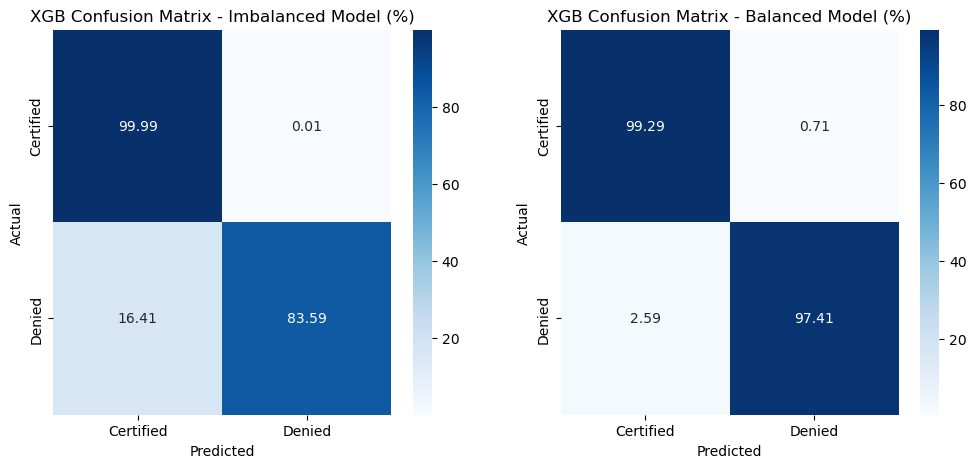

In [80]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_confusion_matrix(y_test, yXGB_pred_imbalanced, 'XGB Confusion Matrix - Imbalanced Model (%)', axes[0])
plot_confusion_matrix(y_test, yXGB_pred_balanced, 'XGB Confusion Matrix - Balanced Model (%)', axes[1])
plt.show()

### 4. Random Forest

In [81]:
# Initialize and train Random Forest model
rf_model_imbalanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_imbalanced.fit(X_train, y_train)

# Predictions and evaluation
yRF_pred_imbalanced = rf_model_imbalanced.predict(X_test)
print("Accuracy_Random Forest:", accuracy_score(y_test, yRF_pred_imbalanced))
print(classification_report(y_test, yRF_pred_imbalanced))

Accuracy_Random Forest: 0.9988916012138073
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    987767
           1       0.99      0.84      0.91      6460

    accuracy                           1.00    994227
   macro avg       1.00      0.92      0.95    994227
weighted avg       1.00      1.00      1.00    994227



In [82]:
# Initialize and train Random Forest model with balanced train dataset
rf_model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_balanced.fit(X_resampled, y_resampled)

# Predictions and evaluation
yRF_pred_balanced = rf_model_balanced.predict(X_test)
print("Accuracy_Random Forest:", accuracy_score(y_test, yRF_pred_balanced))
print(classification_report(y_test, yRF_pred_balanced))

Accuracy_Random Forest: 0.9988664560507812
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    987767
           1       0.98      0.85      0.91      6460

    accuracy                           1.00    994227
   macro avg       0.99      0.92      0.95    994227
weighted avg       1.00      1.00      1.00    994227



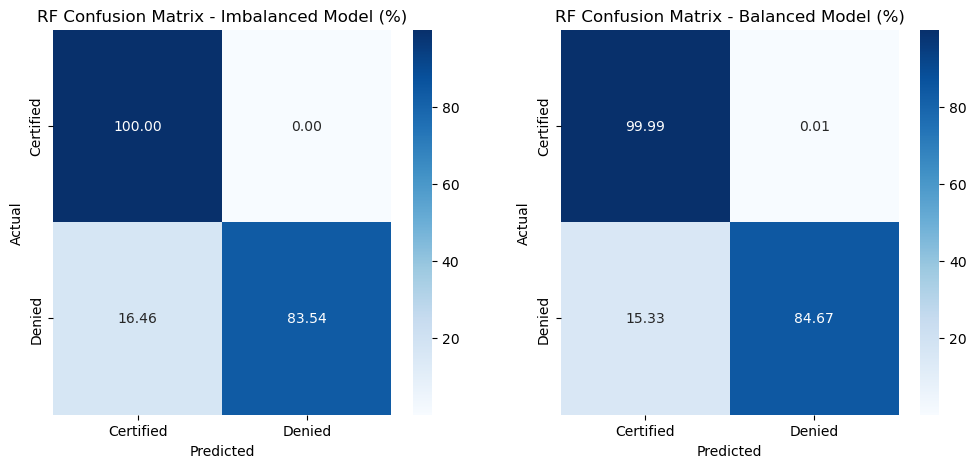

In [83]:
# Visualization 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_confusion_matrix(y_test, yRF_pred_imbalanced, 'RF Confusion Matrix - Imbalanced Model (%)', axes[0])
plot_confusion_matrix(y_test, yRF_pred_balanced, 'RF Confusion Matrix - Balanced Model (%)', axes[1])
plt.show()

### Run-Time Calculation

In [84]:
# Run Time Calculation: Logistic Regression
start_time = time.time()
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
end_time = time.time()
log_reg_time = end_time - start_time
print(f"Logistic Regression Training Time: {log_reg_time:.2f} seconds")

Logistic Regression Training Time: 32.02 seconds


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Run Time Calculation: Neural Network
start_time = time.time()
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
end_time = time.time()
nn_time = end_time - start_time
print(f"Neural Network Training Time: {nn_time:.2f} seconds")

In [86]:
# Run Time Calculation: XGBoost
start_time = time.time()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
end_time = time.time()
xgb_time = end_time - start_time
print(f"XGBoost Training Time: {xgb_time:.2f} seconds")

/home/seh011/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning:

[21:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Training Time: 3.02 seconds


In [87]:
# Run Time Calculation: Random Forest
start_time = time.time()
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
end_time = time.time()
rf_time = end_time - start_time
print(f"Random Forest Training Time: {rf_time:.2f} seconds")

Random Forest Training Time: 584.17 seconds


In [90]:
# Summary of model training times
training_times = {
    "Logistic Regression": log_reg_time,
    #"Neural Network": nn_time,
    "XGBoost": xgb_time,
    "Random Forest": rf_time
}

print("\nModel Training Time Summary:")
for model, time_taken in training_times.items():
    print(f"{model}: {time_taken:.2f} seconds")


Model Training Time Summary:
Logistic Regression: 32.02 seconds
XGBoost: 3.02 seconds
Random Forest: 584.17 seconds


### Best Performing Model - XGBoost: Feature Importance

Top 10 Important Features:
                 Feature  Importance
17     Decision_Duration    0.733876
14      WORKSITE_WORKERS    0.131152
2            SUPPORT_H1B    0.055022
16         RECEIVED_DATE    0.013540
3         H_1B_DEPENDENT    0.011468
8   AGENT_ATTORNEY_STATE    0.005313
9    AGENT_ATTORNEY_CITY    0.004901
1            ANNUAL_WAGE    0.004751
6          EMPLOYER_CITY    0.004665
4          EMPLOYER_NAME    0.004648


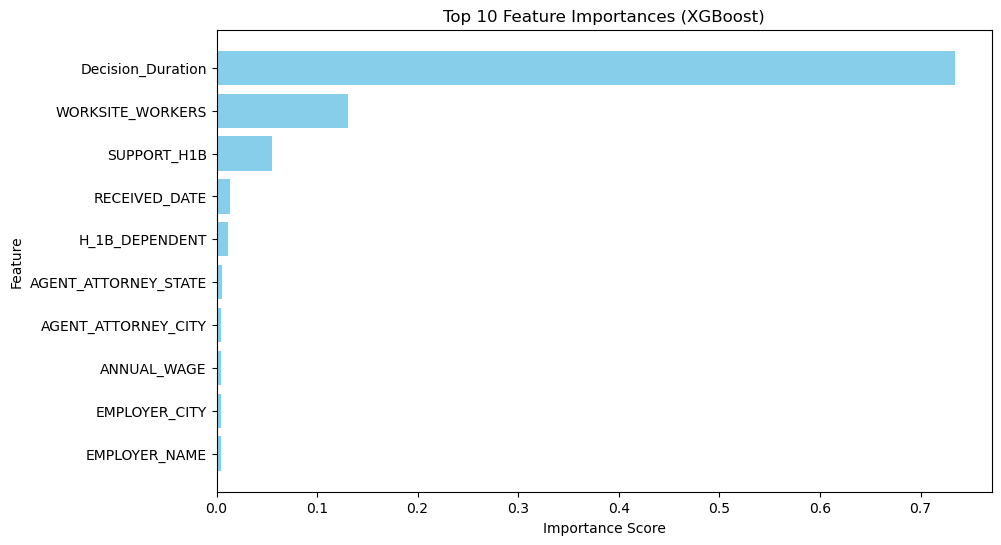

In [88]:
# Get feature importance
feature_importance = xgb_model.feature_importances_
feature_names = X_train.columns

# Convert to a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print("Top 10 Important Features:")
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances (XGBoost)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()